# NumPyとSciPyの使い方

## ライブラリ
  よく使用する機能をパッケージ化したもの
  うまく活用することで、自分で機能を開発せずに楽に早く開発を行うことができます。
  言語については、高速処理を求められるライブラリについてはCやFortranなどのコンパイラ言語で作成されています。

## NumPyとSciPy
  - NumPy...数値計算、行列演算などを高速に処理することができるPythonの強力なライブラリの一つ

  - SciPy...NumPyを用いて様々な科学的な計算を行うことができるライブラリ

## NumPyの使い方

  　数値計算では行列を扱うことが非常に多く、特に行列同士の積の計算が非常に重要です。スパコンの評価指標の１つにこの演算が組み込まれています。行列の積の定義は3重ループで計算できるが、通常の家庭用PCなどでは演算能力不足です。よって効率的に演算する必要があります。

## NumPy配列のつくり方

In [ ]:
import numpy as np

In [ ]:
data=np.array([1, 2, 3])
print(data)

[1 2 3]


In [ ]:
a=np.array([[1, 2],[3, 4]])
print(a)

[[1 2]
 [3 4]]


In [ ]:
# 要素がゼロの配列を作るには
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [ ]:
z=np.zeros((2, 2))
print(z)

[[0. 0.]
 [0. 0.]]


## NumPy配列同士の演算

NumPy配列は「形」を保持しており、shapeでその形を知ることができる

In [ ]:
b=np.array([[5, 6], [7, 8]])
print(f"a={a}\nb={b}")
print(a*b)

a=[[1 2]
 [3 4]]
b=[[5 6]
 [7 8]]
[[ 5 12]
 [21 32]]


In [ ]:
#行列行列積の計算
c=a.dot(b)
print(c)

[[19 22]
 [43 50]]


## NumPy配列の中身

  NumPy配列ではどのような形でも作ることができるが、1次元配列として保存される

In [ ]:
# 1次元配列の場合、arangeを使用する
a=np.arange(8)
print(f"{a}\n")

# 4行2列の行列の場合、reshapeを使用する
b=a.reshape((4, 2))
print(f"{b}\n")

# (2, 2, 2)の行列の場合
c=a.reshape((2, 2, 2))
print(f"{c}\n")

[0 1 2 3 4 5 6 7]

[[0 1]
 [2 3]
 [4 5]
 [6 7]]

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]



## SciPy

  NumPyを基礎にした科学計算ライブラリ
  今回は、固有値や固有ベクトルを求める

In [ ]:
from scipy import linalg
import numpy as np

In [ ]:
a=np.array([[1, 2], [2, 1]])
w, v=linalg.eig(a)
print(w)
print(v)

[ 3.+0.j -1.+0.j]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## シュレディンガー方程式

1. トンネル効果  
　量子力学の最も突飛な発想は、世の中のものは「粒子」と「波動」の二面性を持っていると考えることです。例えば、光は「光子」という粒子としての性質と「電磁波」という波の性質を合わせ持っています。現在ではこの考えが正しいことがわかっていますが、人間の目に見える大きさでは波としての性質がほとんど見えないこともわかりました。そのため、量子力学が発見されるまでには長い時間がかかったのです。  
　一方で、量子力学によれば、ボールが波のように振る舞うことで、壁のエネルギーに満たない場合でも壁の向こう側に「すり抜ける」ことができます。これは、まるでボールが壁に穴を開けて向こう側に行ったように見えることから、「トンネル効果」と呼ばれています。

2. シュレディンガー方程式  
　マクロ物体の運動はニュートンの運動方程式によって記述されるが、ミクロな現象は量子力学に支配されている。例えば、電子の動きはシュレディンガー方程式に従う
  hはプランク定数、mは質量、Vはポテンシャルで任意の(x, y, z)の高さを表す。{}の後ろにつく記号は波動関数であり、この方程式を解くことでわかることができる。



## 特異値分解による画像圧縮

　わかんない?


# 課題:NumPyとSciPyの使い方

1. シュレディンガー方程式

In [24]:
# ライブラリのインポート
import matplotlib.pyplot as plt
from scipy import linalg
import numpy as np

In [25]:
# 行列の生成
N=32
V=np.zeros(N)
V[N//4:3*N//4]=-5.0
H=np.zeros((N, N))
for i in range(N):
  i1=(i+1)%N
  i2=(i-1+N)%N
  H[i][i]=2.0+V[i]
  H[i][i1]=-1
  H[i][i2]=-1

In [27]:
# 固有値と最低固有エネルギー
w, v=linalg.eigh(H)
  # 最小値を求める場合、np.min()でもいいが、固有ベクトルを使用する際にインデックスが必要なため、利用している
i0=np.argmin(w)
print(w[i0])

-4.9672674197348705


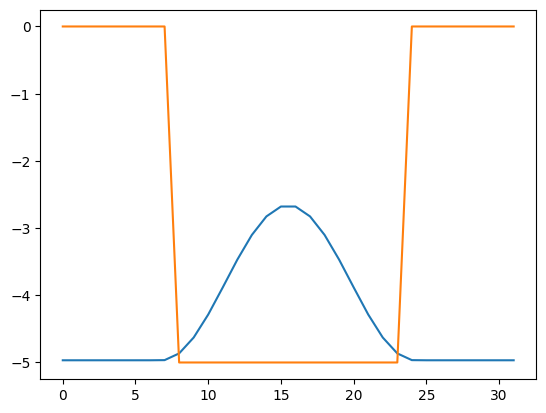

In [28]:
# 波動関数の可視化
v=v[:, i0]
v=v*v
plt.plot(v*20+w[i0])
plt.plot(V)

  2. 行列の低ランク近似による画像処理

In [29]:
# ライブラリのインポート
import urllib.request
import numpy as np
from PIL import Image
from scipy import linalg
from io import BytesIO

In [30]:
# 画像のダウンロード関数
def download(url):
  with urllib.request.urlopen(url) as f:
    data=f.read()
    return Image.open(BytesIO(data))

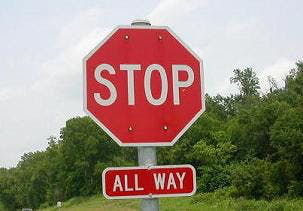

In [31]:
# 画像の表示
URL="https://kaityo256.github.io/python_zero/numpy/stop.jpg"
download(URL)

In [32]:
# モノクロ変換
def mono(url):
  img=download(url)
  gray_img=img.convert("L")
  return gray_img


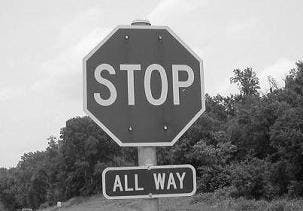

In [33]:
# モノクロ変換テスト
URL="https://kaityo256.github.io/python_zero/numpy/stop.jpg"
mono(URL)

In [37]:
# 画像の低ランク近似
def svd(url, ratio):
  gray_img=mono(url)
  a=np.asarray(gray_img)
  w, _=a.shape
  rank=int(w*ratio)
  u, s, v=linalg.svd(a)
  ur=u[:, :rank]
  sr=np.matrix(linalg.diagsvd(s[:rank], rank, rank))
  vr=v[:rank, :]
  b=np.asarray(ur*sr*vr)
  return Image.fromarray(np.uint8(b))

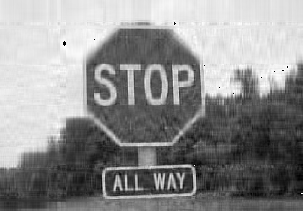

In [38]:
# 画像の低ランク近似の確認
URL="https://kaityo256.github.io/python_zero/numpy/stop.jpg"
ratio=0.1
svd(URL, ratio)

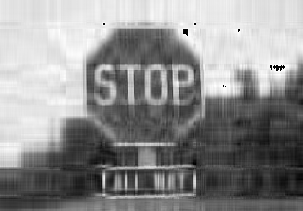

In [39]:
ratio=0.05
svd(URL, ratio)

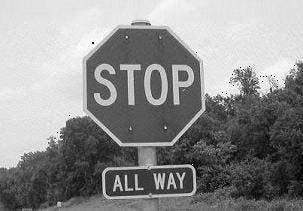

In [44]:
ratio=0.5
svd(URL, ratio)

# 発展課題

  いくつかのratioの値を試し、「画像の近似のしやすさ」「再現性がいいところ悪いところ」に気づいた部分があれば記述せよ。また、「黒い斑点」のようなものが現れる場合があるのはなぜか

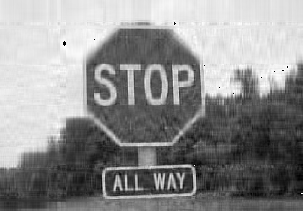

In [47]:
URL2="https://kaityo256.github.io/python_zero/numpy/stop.jpg" #ここを指定せよ
ratio=0.1
svd(URL2, ratio)